In [1]:
import pandas as pd

# Part 1 - Step 1

In [2]:
data = pd.read_excel('Assignment 3.xlsx')

# Building the training and test datasets as specified

# Filtering the first 400 restaurant reviews and the first 400 movie reviews
train_restaurant = data[(data['label'] == 'restaurant') & (data['id'] <= 400)]
train_movie = data[(data['label'] == 'movie') & (data['id'] >= 501) & (data['id'] <= 900)]

# Combining the two datasets to form the training dataset
train_dataset = pd.concat([train_restaurant, train_movie])

# The rest of the data will be used as the test dataset
test_dataset = data.drop(train_dataset.index)

# Checking the first few rows of each dataset to ensure they are correct
train_dataset.head(), test_dataset.head()

(   id                                             review       label
 0   1  About the shop: There is a restaurant in Soi L...  restaurant
 1   2  About the shop: Through this store for about t...  restaurant
 2   3  Roast Coffee &amp; Eatery is a restaurant loca...  restaurant
 3   4  Eat from the children. The shop is opposite. P...  restaurant
 4   5  The Ak 1 shop at another branch tastes the sam...  restaurant,
       id                                             review       label
 400  401  This shop is one of my favorites. Not far from...  restaurant
 401  402  This is the first time to eat a crab cake or s...  restaurant
 402  403  two stars for good environment and quite ok fo...  restaurant
 403  404  The restaurant is decorated like a scaffolding...  restaurant
 404  405  Good fresh food, especially raw fish, plus aki...  restaurant)

# Part 1 - Step 2

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

# Define a custom tokenizer function
def custom_tokenizer(text):
    # Initialize WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # Split the text into words
    words = text.split()

    # Lemmatize, remove stop words and punctuations
    tokens = [lemmatizer.lemmatize(word) for word in words 
              if word.lower() not in stopwords.words('english') 
              and word not in string.punctuation]

    return tokens

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=5, ngram_range=(1, 2))

# Apply TF-IDF transformation to the training dataset
tfidf_matrix = tfidf_vectorizer.fit_transform(train_dataset['review'])

# Example: To view the shape of the TF-IDF matrix and feature names
print(tfidf_matrix.shape)
print(tfidf_vectorizer.get_feature_names_out()[:10])


/Users/harsh/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(800, 5218)
['!!' '!!!' '&amp;' '&quot;' '&quot;a' '&quot;all' '&quot;black'
 '&quot;can' '&quot;crazy' '&quot;da']


# Part 1 - Step 3

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, train_dataset['label'], test_size=0.3, random_state=42)

# Initialize models
naive_bayes_model = MultinomialNB()
logit_model = LogisticRegression()
random_forest_model = RandomForestClassifier(n_estimators=50)
svm_model = SVC()
ann_model = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000)

# Dictionary to store models
models = {
    "Naive Bayes": naive_bayes_model,
    "Logistic Regression": logit_model,
    "Random Forest": random_forest_model,
    "SVM": svm_model,
    "ANN": ann_model
}

# Train each model and calculate accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy:.2f}")

# Note: This code assumes that the tfidf_matrix and train_dataset['label'] are already created and available.


Naive Bayes Accuracy: 1.00
Logistic Regression Accuracy: 0.99
Random Forest Accuracy: 0.97
SVM Accuracy: 0.98
ANN Accuracy: 0.97


/Users/harsh/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Part 1 - Step 4

In [5]:
#pip install keras

In [6]:
#pip install --upgrade keras tensorflow

In [7]:
#pip install tensorflow

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Number of words to consider as features
max_features = 10000  # This is an arbitrary number, you can adjust it based on your vocabulary size

# Maximum length of each document
maxlen = 100

# Initialize the tokenizer with a maximum number of words
tokenizer = Tokenizer(num_words=max_features)

# Fit the tokenizer on the training data
tokenizer.fit_on_texts(train_dataset['review'])

# Convert the texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_dataset['review'])
test_sequences = tokenizer.texts_to_sequences(test_dataset['review'])

# Pad the sequences so they all have the same length
X_train = pad_sequences(train_sequences, maxlen=maxlen)
X_test = pad_sequences(test_sequences, maxlen=maxlen)

# Example: To view the shape of the sequences
print(X_train.shape)
print(X_test.shape)

(800, 100)
(200, 100)


# Part 1 - Step 5

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming max_features and maxlen are defined as before
max_features = 10000
maxlen = 100

# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_dataset['review'])

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_dataset['review'])
test_sequences = tokenizer.texts_to_sequences(test_dataset['review'])

# Pad sequences
X_train = pad_sequences(train_sequences, maxlen=maxlen)
X_test = pad_sequences(test_sequences, maxlen=maxlen)

# Convert labels to numeric
y_train = np.array(train_dataset['label'].apply(lambda x: 1 if x == 'movie' else 0))
y_test = np.array(test_dataset['label'].apply(lambda x: 1 if x == 'movie' else 0))

# Define the model
model = Sequential()
model.add(Embedding(max_features, 20, input_length=maxlen))
model.add(LSTM(40, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


Epoch 1/10
8/8 [==============================] - 1s 61ms/step - loss: 0.6918 - accuracy: 0.5450 - val_loss: 0.6888 - val_accuracy: 0.6550
Epoch 2/10
8/8 [==============================] - 0s 45ms/step - loss: 0.6836 - accuracy: 0.8012 - val_loss: 0.6771 - val_accuracy: 0.8700
Epoch 3/10
8/8 [==============================] - 0s 45ms/step - loss: 0.6482 - accuracy: 0.9325 - val_loss: 0.5837 - val_accuracy: 0.9850
Epoch 4/10
8/8 [==============================] - 0s 54ms/step - loss: 0.3952 - accuracy: 0.9688 - val_loss: 0.2372 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 0s 46ms/step - loss: 0.2136 - accuracy: 0.9550 - val_loss: 0.2631 - val_accuracy: 0.9250
Epoch 6/10
8/8 [==============================] - 0s 45ms/step - loss: 0.2391 - accuracy: 0.9287 - val_loss: 0.3491 - val_accuracy: 0.8800
Epoch 7/10
8/8 [==============================] - 0s 47ms/step - loss: 0.2404 - accuracy: 0.9187 - val_loss: 0.3015 - val_accuracy: 0.8900
Epoch 8/10
8/8 [===========

# Part 2 - Step 1

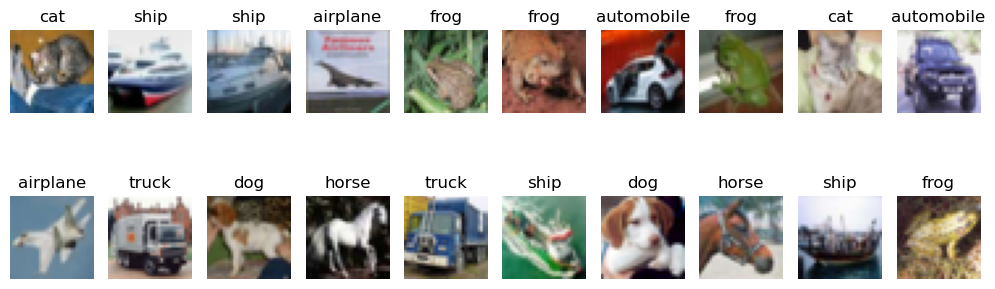

In [23]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define the CIFAR-10 classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize the first 20 images of the test set
plt.figure(figsize=(10, 4))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i])
    plt.title(classes[y_test[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Part 2 - Step 2

In [12]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),  # a
    Dropout(0.2),                                                        # b
    Conv2D(32, (3, 3), activation='relu'),                               # c
    MaxPooling2D(pool_size=(2, 2)),                                      # d
    Conv2D(64, (3, 3), activation='relu'),                               # e
    Dropout(0.2),                                                        # f
    Conv2D(64, (3, 3), activation='relu'),                               # g
    MaxPooling2D(pool_size=(2, 2)),                                      # h
    Flatten(),                                                           # i
    Dense(256, activation='relu'),                                       # j
    Dropout(0.2),                                                        # k
    Dense(10, activation='softmax')                                      # l
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 500  # Smaller than 500 to prevent overheating
epochs = 5
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

# Evaluate the model
accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch 1/5
100/100 [==============================] - 26s 252ms/step - loss: 1.8566 - accuracy: 0.3230 - val_loss: 1.7781 - val_accuracy: 0.3576
Epoch 2/5
100/100 [==============================] - 22s 225ms/step - loss: 1.4671 - accuracy: 0.4694 - val_loss: 1.4522 - val_accuracy: 0.4808
Epoch 3/5
100/100 [==============================] - 24s 243ms/step - loss: 1.3190 - accuracy: 0.5296 - val_loss: 1.2516 - val_accuracy: 0.5598
Epoch 4/5
100/100 [==============================] - 24s 236ms/step - loss: 1.2041 - accuracy: 0.5729 - val_loss: 1.1731 - val_accuracy: 0.5887
Epoch 5/5
100/100 [==============================] - 25s 245ms/step - loss: 1.1096 - accuracy: 0.6073 - val_loss: 1.0774 - val_accuracy: 0.6156
Accuracy: 61.56%


# Part 2 - Step 3

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the modified CNN model
model_modified = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),  # a
    Dropout(0.2),                                                          # b
    Conv2D(32, (3, 3), activation='relu'),                                 # c
    MaxPooling2D(pool_size=(2, 2)),                                        # d
    Conv2D(64, (3, 3), activation='relu'),                                 # e
    Dropout(0.2),                                                          # f
    Conv2D(64, (3, 3), activation='relu'),                                 # g
    MaxPooling2D(pool_size=(2, 2)),                                        # h
    Conv2D(128, (3, 3), activation='relu'),                                # step 3 a
    Dropout(0.2),                                                          # step 3 b
    Conv2D(128, (3, 3), activation='relu'),                                # step 3 c
    Flatten(),                                                             # i
    Dense(256, activation='relu'),                                         # j
    Dropout(0.2),                                                          # k
    Dense(10, activation='softmax')                                        # l
])

# Compile the modified model
model_modified.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the modified model
batch_size = 500  # Smaller than 500 to prevent overheating
epochs = 5
model_modified.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

# Evaluate the modified model
accuracy_modified = model_modified.evaluate(x_test, y_test, verbose=0)[1]
print(f'Accuracy: {accuracy_modified * 100:.2f}%')


Epoch 1/5
100/100 [==============================] - 25s 245ms/step - loss: 1.9452 - accuracy: 0.2693 - val_loss: 1.7464 - val_accuracy: 0.3603
Epoch 2/5
100/100 [==============================] - 24s 245ms/step - loss: 1.6043 - accuracy: 0.4059 - val_loss: 1.5210 - val_accuracy: 0.4459
Epoch 3/5
100/100 [==============================] - 25s 252ms/step - loss: 1.4288 - accuracy: 0.4761 - val_loss: 1.3498 - val_accuracy: 0.5214
Epoch 4/5
100/100 [==============================] - 25s 249ms/step - loss: 1.3098 - accuracy: 0.5274 - val_loss: 1.2616 - val_accuracy: 0.5441
Epoch 5/5
100/100 [==============================] - 27s 271ms/step - loss: 1.2197 - accuracy: 0.5611 - val_loss: 1.1784 - val_accuracy: 0.5786
Accuracy: 57.86%


# Part 2 - Step 4

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the modified CNN model (from step 3)
model_modified = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),  # a
    Dropout(0.2),                                                          # b
    Conv2D(32, (3, 3), activation='relu'),                                 # c
    MaxPooling2D(pool_size=(2, 2)),                                        # d
    Conv2D(64, (3, 3), activation='relu'),                                 # e
    Dropout(0.2),                                                          # f
    Conv2D(64, (3, 3), activation='relu'),                                 # g
    MaxPooling2D(pool_size=(2, 2)),                                        # h
    Conv2D(128, (3, 3), activation='relu'),                                # step 3 a
    Dropout(0.2),                                                          # step 3 b
    Conv2D(128, (3, 3), activation='relu'),                                # step 3 c
    Flatten(),                                                             # i
    Dense(256, activation='relu'),                                         # j
    Dropout(0.2),                                                          # k
    Dense(10, activation='softmax')                                        # l
])

# Compile the model
model_modified.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model for 20 epochs
batch_size = 500  # Smaller than 500 to prevent overheating
epochs_extended = 20
model_modified.fit(x_train, y_train, batch_size=batch_size, epochs=epochs_extended, validation_data=(x_test, y_test), verbose=1)

# Evaluate the model
accuracy_extended = model_modified.evaluate(x_test, y_test, verbose=0)[1]
print(f'Accuracy after 20 epochs: {accuracy_extended * 100:.2f}%')


Epoch 1/20
100/100 [==============================] - 26s 258ms/step - loss: 1.9565 - accuracy: 0.2647 - val_loss: 1.7247 - val_accuracy: 0.3670
Epoch 2/20
100/100 [==============================] - 26s 264ms/step - loss: 1.6011 - accuracy: 0.4078 - val_loss: 1.4630 - val_accuracy: 0.4661
Epoch 3/20
100/100 [==============================] - 25s 254ms/step - loss: 1.4032 - accuracy: 0.4881 - val_loss: 1.2919 - val_accuracy: 0.5404
Epoch 4/20
100/100 [==============================] - 26s 260ms/step - loss: 1.2854 - accuracy: 0.5360 - val_loss: 1.2533 - val_accuracy: 0.5546
Epoch 5/20
100/100 [==============================] - 26s 259ms/step - loss: 1.1811 - accuracy: 0.5788 - val_loss: 1.1211 - val_accuracy: 0.6055
Epoch 6/20
100/100 [==============================] - 27s 266ms/step - loss: 1.1168 - accuracy: 0.6001 - val_loss: 1.1189 - val_accuracy: 0.6098
Epoch 7/20
100/100 [==============================] - 27s 272ms/step - loss: 1.0534 - accuracy: 0.6241 - val_loss: 1.0436 - val_ac

# Part 2 - Step 5

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Flatten the image data
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Reshape the labels for Naïve Bayes
y_train_flat = y_train.argmax(axis=1)
y_test_flat = y_test.argmax(axis=1)

# Train a Naïve Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train_flat, y_train_flat)

# Train a Random Forest model with 100 trees and max depth of 10
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
random_forest_model.fit(x_train_flat, y_train_flat)

# Predictions using Naïve Bayes
y_pred_nb = naive_bayes_model.predict(x_test_flat)
accuracy_nb = accuracy_score(y_test_flat, y_pred_nb)

# Predictions using Random Forest
y_pred_rf = random_forest_model.predict(x_test_flat)
accuracy_rf = accuracy_score(y_test_flat, y_pred_rf)

accuracy_nb, accuracy_rf


(0.2933, 0.4331)